# COGS 108 - EDA Checkpoint

# Names

- Prabhjyot Sodhi
- Sahithi Karumudi
- Yash Patki
- Joy Yue Lam (Joyce)
- David Boateng

<a id='research_question'></a>
# Research Question

What is the relationship between Family/Social Support, GDP, Health (Life Expectancy), and Generosity in determining the overall Happiness of a country? Which factors have the strongest correlation with Happiness, and how do they interrelate? 

# Setup

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

We are using the official World Happiness Report datasets posted on Kaggle, therefore the datasets were relatively clean and organized. 

We are planning to use 9 different datasets, one for each year from 2015-2023. The World Happiness Score is determined using 6 primary factors which include GDP, Family, Life Expectancy (Health), Freedom, Trust on Government, and Generosity. Across the datasets, we planned to remove the additional columns, like for instance the lower and upper bounds for confidence, dystopia residuals scores, and other extraneous variables. 

There are two ways we plan to analyze the data: we want to find a trend for specific countries between the years of 2015 and 2023 and we also want to compare differences between countries. Therefore, we want to only include countries that have the necessary data (all 6 factors) for each year between 2015 and 2023. This will allow is to find a trend for the Happiness Score and its relation to other factors through time, as well as enable us to compare scores between countries. 

In other words, we will need to further clean the data by removing rows for countries that do not have data in each of the datasets mentioned above. To get the data in a usable format, we had to change column names to standardize them across all the datasets and delete the extra data as mentioned previously. The steps we took to clean the data are shown below.


In [145]:
# Read in the data
df_15 = pd.read_csv('data/2015.csv')
df_16 = pd.read_csv('data/2016.csv')
df_17 = pd.read_csv('data/2017.csv')
df_18 = pd.read_csv('data/2018.csv')
df_19 = pd.read_csv('data/2019.csv')
df_20 = pd.read_csv('data/2020.csv')
df_21 = pd.read_csv('data/2021.csv')
df_22 = pd.read_csv('data/2022.csv')
df_23 = pd.read_csv('data/2023.csv')

# Create a list of the years
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Make a list of the dataframes
dfs = [df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23]

# Standardize the column names, hard-coded values for each year
column_mapping = {
    2015: {
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP',
    'Family': 'Social Support',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Freedom': 'Freedom',
    'Trust (Government Corruption)': 'Trust',
    'Generosity': 'Generosity',
    },
    2016: {
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP',
    'Family': 'Social Support',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Freedom': 'Freedom',
    'Trust (Government Corruption)': 'Trust',
    'Generosity': 'Generosity',
    },
    2017: {
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'GDP',
    'Family': 'Social Support',
    'Health..Life.Expectancy.': 'Life Expectancy',
    'Freedom': 'Freedom',
    'Trust..Government.Corruption.': 'Trust',
    'Generosity': 'Generosity',
    },
    2018: {
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP',
    'Social support': 'Social Support',
    'Healthy life expectancy': 'Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust',
    'Generosity': 'Generosity',
    },
    2019: {
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP',
    'Social support': 'Social Support',
    'Healthy life expectancy': 'Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust',
    'Generosity': 'Generosity',
    },
    2020: {
    'Country name': 'Country',
    'Ladder score': 'Happiness Score',
    'Explained by: Log GDP per capita': 'GDP',
    'Explained by: Social support': 'Social Support',
    'Explained by: Healthy life expectancy': 'Life Expectancy',
    'Explained by: Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity - 2020',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Trust',
    },
    2021: {
    'Country name': 'Country',
    'Ladder score': 'Happiness Score',
    'Explained by: Log GDP per capita': 'GDP',
    'Explained by: Social support': 'Social Support',
    'Explained by: Healthy life expectancy': 'Life Expectancy',
    'Explained by: Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity - 2021',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Trust',
    },
    2022: {
    'Happiness score': 'Happiness Score',
    'Explained by: GDP per capita': 'GDP',
    'Explained by: Social support': 'Social Support',
    'Explained by: Healthy life expectancy': 'Life Expectancy',
    'Explained by: Freedom to make life choices': 'Freedom',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Trust',
    },
    2023: {
    'Country name': 'Country',
    'Ladder score': 'Happiness Score',
    'Explained by: Log GDP per capita': 'GDP',
    'Explained by: Social support': 'Social Support',
    'Explained by: Healthy life expectancy': 'Life Expectancy',
    'Explained by: Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity - 2023',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Trust',
    }
}

# Rename the columns for each dataframe
for year, df in zip(years, dfs):
    df.rename(columns=column_mapping[year], inplace=True)

# Clean the 2015 data by dropping columns that are not needed
columns_to_keep = ['Country', 'Happiness Score', 'GDP', 'Social Support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity']

for df in dfs:
    for column in df.columns:
        if column not in columns_to_keep:
            df.drop(column, axis=1, inplace=True)

# Change country column name
for df in dfs:
    df.rename(columns={'Country': 'Country or Region'}, inplace=True)

# Drop the rows that have NaN values
for df in dfs:
    df.dropna(inplace=True)

# Remove the countries that are not in all of the dataframes
country_sets = []

for df in dfs:
    country_set = set(df['Country or Region'].unique())
    country_sets.append(country_set)

# Find the countries that are in all of the dataframes
countries_in_all = set.intersection(*country_sets)

# Remove the countries that are not in all of the dataframes
for idx, df in enumerate(dfs):
    dfs[idx] = df[df['Country or Region'].isin(countries_in_all)]


In [146]:
# Print the shape of each dataframe
for year, df in zip(years, dfs):
    print(f'{year} Dataframe')
    print(df.shape)
    print('---------------')

2015 Dataframe
(115, 8)
---------------
2016 Dataframe
(115, 8)
---------------
2017 Dataframe
(115, 8)
---------------
2018 Dataframe
(115, 8)
---------------
2019 Dataframe
(115, 8)
---------------
2020 Dataframe
(115, 8)
---------------
2021 Dataframe
(115, 8)
---------------
2022 Dataframe
(115, 8)
---------------
2023 Dataframe
(115, 8)
---------------


Note that each of the dataframes has the same shape, so we have the same countries and columns for each year. Let's take a look at the head of all the dataframes below to verify this.

In [147]:
df_15.head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [148]:
df_16.head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [149]:
df_17.head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [150]:
df_18.head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [151]:
df_19.head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [152]:
df_20.head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101


In [153]:
df_21.head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384


In [154]:
df_22.head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Finland,"7,821","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,"7,636","1,953","1,243","0,777","0,719","0,188","0,532"
2,Iceland,"7,557","1,936","1,320","0,803","0,718","0,270","0,191"
3,Switzerland,"7,512","2,026","1,226","0,822","0,677","0,147","0,461"
4,Netherlands,"7,415","1,945","1,206","0,787","0,651","0,271","0,419"


Notice that the 2022 Dataset has commas in the numbers instead of periods. We will need to remove these commas and convert the numbers to floats.

In [155]:
# Change the commas to periods in the 2022 dataframe for every column
for column in df_22.columns:
    if df_22[column].dtype == 'object':
        df_22[column] = df_22[column].str.replace(',', '.')
df_22.head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419


In [156]:
df_23.head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Finland,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,7.403,1.942,1.488,0.545,0.672,0.251,0.394


As we saw white cleaning the data in the section above, each of the dataframes has the same shape, so we have the same countries and columns for each year. We also cleaned the data by having the same column names for each dataframe. Looking at the head of all the dataframes above, we can see that the data is clean and ready for analysis. Let's add a column for the year to each dataframe so that we can concatenate them into one dataframe.

In [157]:
# Concatenate the dataframes with a column for the year
df_15['Year'] = 2015
df_16['Year'] = 2016
df_17['Year'] = 2017
df_18['Year'] = 2018
df_19['Year'] = 2019
df_20['Year'] = 2020
df_21['Year'] = 2021
df_22['Year'] = 2022
df_23['Year'] = 2023

# Concatenate the dataframes
df = pd.concat([df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23])

In [158]:
# Print the shape of the dataframe
print(df.shape)

(1365, 9)


In [159]:
# Print the head of the dataframe when the Year is 2016
df[df['Year'] == 2016].head()

,Country or Region,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,7.498,1.57744,1.1269,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


Let's take a look at the types of each column in the dataframe. We need to convert all the columns to numeric types so that we can perform analysis later.

In [160]:
# Print the types of the columns
df.dtypes

Country or Region    object
Happiness Score      object
GDP                  object
Social Support       object
Life Expectancy      object
Freedom              object
Trust                object
Generosity           object
Year                  int64
dtype: object

Let's convert all the columns to numeric types.

In [161]:
# Convert all the valid object columns to numeric
for column in df.columns:
    if column != 'Country or Region':
        df[column] = pd.to_numeric(df[column])

In [162]:
# Print the types of the columns
df.dtypes

Country or Region     object
Happiness Score      float64
GDP                  float64
Social Support       float64
Life Expectancy      float64
Freedom              float64
Trust                float64
Generosity           float64
Year                   int64
dtype: object

Now the dataframe `df` is ready for analysis. 

# Data Analysis & Results (EDA)

First, we could use the describe function to get a general idea of the data. 

In [163]:
df.describe()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000
mean,5.440500,1.018542,1.045338,0.583980,0.450919,0.132322,0.196364,2018.901099
std,1.118053,0.453085,0.331248,0.245196,0.156780,0.112583,0.113328,2.560363
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.596000,0.696000,0.832044,0.402048,0.356000,0.056767,0.115000,2017.000000
50%,5.440000,1.041000,1.083000,0.612448,0.467735,0.097000,0.182700,2019.000000
75%,6.255000,1.338000,1.299370,0.777625,0.569000,0.166000,0.252960,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.587000,0.838075,2023.000000


Note that this is the data for all the years combined, so this is not very useful. We will need to analyze the data for each year separately. We typically expect normal distributions but if we see distributions that differ from year to year, we would want to delve deeper into the dataset from that particular year. These methods, particularly `describe()`, will also allow us to see measures of central tendency, dispersion, and overall shape of the distribution. 


In [164]:
# Dataframe for 2015
df[df['Year'] == 2015].describe()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2015.0
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.0
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.0
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,2015.0
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2015.0
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2015.0
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,2015.0


In [165]:
# Dataframe for 2016
df[df['Year'] == 2016].describe()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2016.0
std,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.0
min,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0
25%,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2016.0
50%,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2016.0
75%,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2016.0
max,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,2016.0


In [166]:
# Dataframe for 2017
df[df['Year'] == 2017].describe()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0
mean,5.354019,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883,2017.0
std,1.131230,0.420793,0.287263,0.237073,0.149997,0.101661,0.134780,0.0
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.0
25%,4.505500,0.663371,1.042635,0.369866,0.303677,0.057271,0.154106,2017.0
50%,5.279000,1.064578,1.253918,0.606042,0.437454,0.089848,0.231538,2017.0
75%,6.101500,1.318027,1.414316,0.723008,0.516561,0.153296,0.323762,2017.0
max,7.537000,1.870766,1.610574,0.949492,0.658249,0.464308,0.838075,2017.0


In [167]:
# Dataframe for 2018
df[df['Year'] == 2018].describe()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0
mean,5.366897,0.883677,1.216058,0.596877,0.455606,0.112000,0.180974,2018.0
std,1.117433,0.380942,0.301286,0.248312,0.162367,0.096492,0.098789,0.0
min,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0
25%,4.451500,0.612500,1.075500,0.420500,0.357500,0.051000,0.109000,2018.0
50%,5.358000,0.940000,1.258000,0.643000,0.493000,0.082000,0.173000,2018.0
75%,6.154000,1.192500,1.464000,0.778500,0.579000,0.137000,0.240000,2018.0
max,7.632000,1.649000,1.644000,1.030000,0.724000,0.457000,0.598000,2018.0


In [168]:
# Dataframe for 2019
df[df['Year'] == 2019].describe()


,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846,2019.0
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.094538,0.095254,0.0
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.047000,0.108750,2019.0
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.085500,0.177500,2019.0
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.141250,0.248250,2019.0
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.453000,0.566000,2019.0


In [169]:
# Dataframe for 2020
df[df['Year'] == 2020].describe()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,5.47324,0.868771,1.155607,0.692869,0.463583,0.130718,0.189375,2020.0
std,1.11227,0.372416,0.286866,0.254094,0.141172,0.113097,0.100401,0.0
min,2.56690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.0
25%,4.72410,0.575862,0.986718,0.495443,0.381457,0.055805,0.115006,2020.0
50%,5.51500,0.918549,1.203987,0.759818,0.483293,0.098435,0.176745,2020.0
75%,6.22850,1.169229,1.387139,0.867249,0.576665,0.163064,0.255510,2020.0
max,7.80870,1.536676,1.547567,1.137814,0.693270,0.533162,0.569814,2020.0


In [170]:
# Dataframe for 2021
df[df['Year'] == 2021].describe()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0
mean,5.532839,0.977161,0.793315,0.520161,0.498711,0.135141,0.178047,2021.0
std,1.073924,0.404740,0.258871,0.213019,0.137888,0.114361,0.098270,0.0
min,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0
25%,4.852000,0.666000,0.647000,0.357000,0.409000,0.060000,0.105000,2021.0
50%,5.534000,1.025000,0.832000,0.571000,0.514000,0.101000,0.164000,2021.0
75%,6.255000,1.323000,0.996000,0.665000,0.603000,0.174000,0.239000,2021.0
max,7.842000,1.751000,1.172000,0.897000,0.716000,0.547000,0.541000,2021.0


In [171]:
# Dataframe for 2022
df[df['Year'] == 2022].describe()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0
mean,5.553575,1.410445,0.905863,0.586171,0.517226,0.154781,0.147377,2022.0
std,1.086843,0.421663,0.280122,0.176336,0.145859,0.127514,0.082799,0.0
min,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.0
25%,4.888750,1.095500,0.732000,0.463250,0.440500,0.068250,0.089000,2022.0
50%,5.568500,1.445500,0.957500,0.621500,0.543500,0.119500,0.132500,2022.0
75%,6.305000,1.784750,1.114250,0.719750,0.626000,0.198500,0.197750,2022.0
max,7.821000,2.209000,1.320000,0.942000,0.740000,0.587000,0.468000,2022.0


In [172]:
# Dataframe for 2023
df[df['Year'] == 2023].describe()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Trust,Generosity,Year
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.0
mean,5.544441,1.408919,1.155088,0.366176,0.540912,0.146478,0.149088,2023.0
std,1.142841,0.433969,0.327263,0.156691,0.149671,0.127009,0.075993,0.0
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.0
25%,4.702500,1.097750,0.959750,0.248500,0.458750,0.059750,0.098500,2023.0
50%,5.693500,1.451500,1.225500,0.389500,0.557500,0.112000,0.137500,2023.0
75%,6.342500,1.798000,1.401250,0.487500,0.656750,0.188250,0.199250,2023.0
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.561000,0.422000,2023.0


To begin our EDA, we would want to first explore how each of our 6 variables correlates with the `Happiness Score`. So, we can use `sns.scatterplot()`  to see if there is an overall trend with the way each variable is related to happiness over the course of all our datasets as well as `sns.lineplot()` to compare `Happiness Score` trends over the years.

Now, let's take a look at how the `Happiness Score` has changed over the years. We can see that the `Happiness Score` has increased over the years.

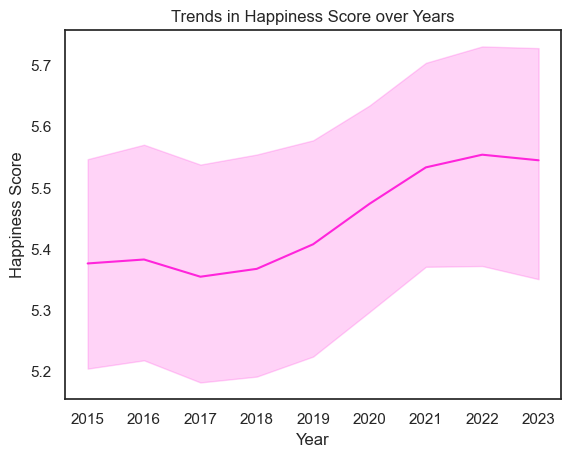

In [173]:
# Line plot
sns.lineplot(x='Year', y='Happiness Score', data=df)
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Trends in Happiness Score over Years')
plt.show()

The plot displays the trend of the `Happiness Score` over the years. The x-axis represents the years, while the y-axis represents the corresponding `Happiness Scores`. The line in the plot connects the data points, showing the change in `Happiness Scores` over time. By analyzing the line's slope and direction, we can see that the  score has increased over the years and in 2023, the score reached its highest (5.5).  This visualization helps to understand the overall trend and pattern in the Happiness Scores and how they have evolved over time.

We would want to run scatterplots with each variable against happiness for each dataset for a total of 30 visualizations. As we proceed, we would then want to compare visualizations within each dataset as well as visualizations with the same factor vs. happiness over time (i.e. GDP vs Happiness in 2015, 2016, 2017 etc.)

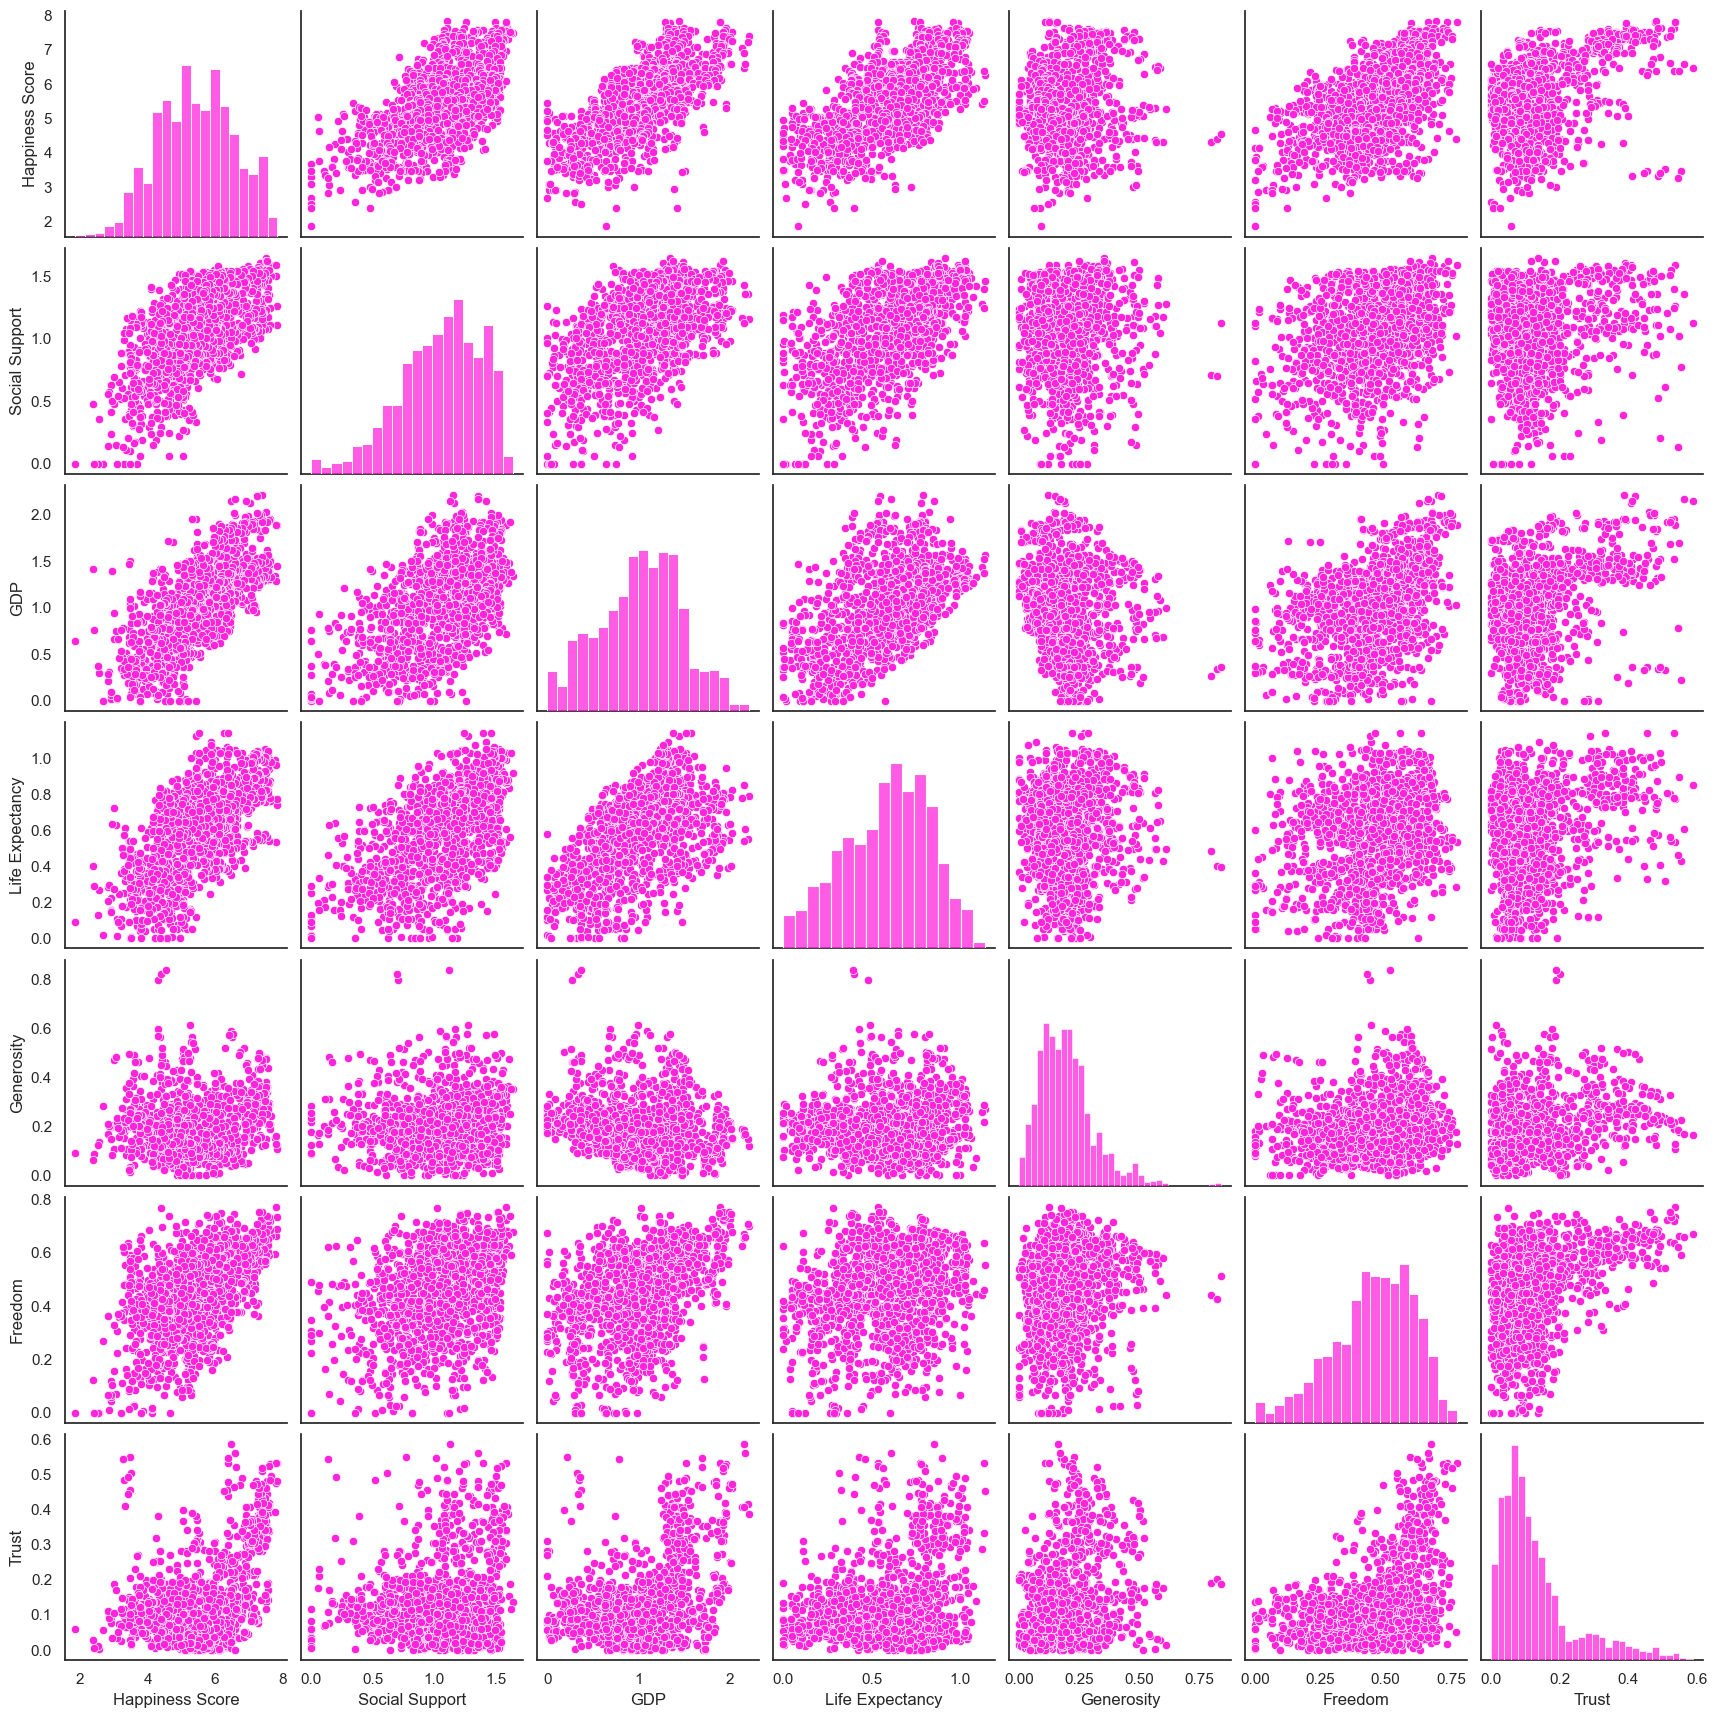

In [174]:
sns.pairplot(data=df, vars=['Happiness Score', 'Social Support', 'GDP', 'Life Expectancy', 'Generosity', 'Freedom', 'Trust'])
plt.show()

Let's take a look at individual scatter plots for each of the six factors against the `Happiness Score`.

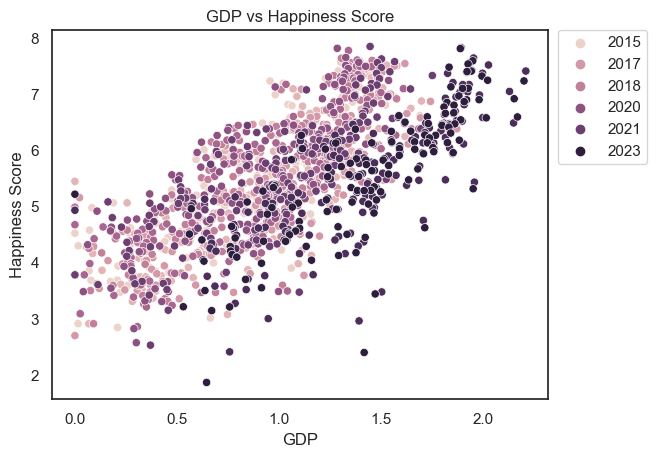

In [175]:
# Scatter plot GDP vs. Happiness Score
sns.scatterplot(data=df, x='GDP', y='Happiness Score', hue='Year')
plt.title('GDP vs Happiness Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

The scatter plot displays the relationship between two variables: `GDP` and `Happiness Score`. Each data point represents a specific year, distinguished by different colors or hues. The x-axis represents the GDP values, which indicate the economic output or prosperity of a country. The y-axis represents the corresponding Happiness Score, which quantifies the subjective well-being or happiness level of a country. 

By examining the distribution of the data points on the plot, we can analyze the correlation between GDP and Happiness Score. According to the plot, we can see that the data points are tightly clustered and show an upward trend from left to right, it suggests a positive correlation. In this case, higher GDP values tend to be associated with higher Happiness Scores. This pattern implies that economic prosperity may contribute to increased happiness levels.


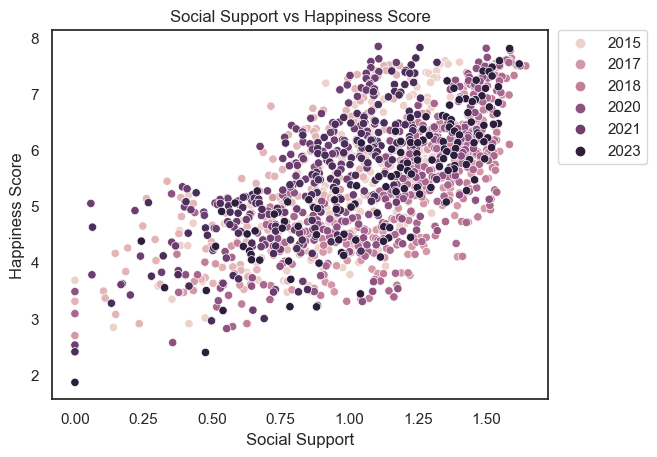

In [176]:
# Scatter plot Social Support vs. Happiness Score
sns.scatterplot(data=df, x='Social Support', y='Happiness Score', hue='Year')
plt.title('Social Support vs Happiness Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

The plot represents the relationship between two variables: `Social Support` and `Happiness Score`. The data used for the plot is derived from the DataFrame, df. Each data point on the plot represents a specific year, indicated by different colors or hues as specified by the "Year" variable. The x-axis represents the "Social Support" values, which indicate the level of social connections and support within a given country. This variable captures aspects such as having someone to rely on in times of need, the presence of supportive relationships, and a sense of belonging. The y-axis represents the corresponding "Happiness Score," which quantifies the subjective well-being or happiness level of a country.

By examining the distribution of the data points on the scatter plot, we can analyze the correlation between Social Support and Happiness Score. According to the plot, we can see that the data points cluster closely and show an upward trend from left to right, it suggests a positive correlation. In this case, higher levels of social support are associated with higher Happiness Scores. This pattern suggests that strong social connections and support systems may contribute to increased happiness levels.


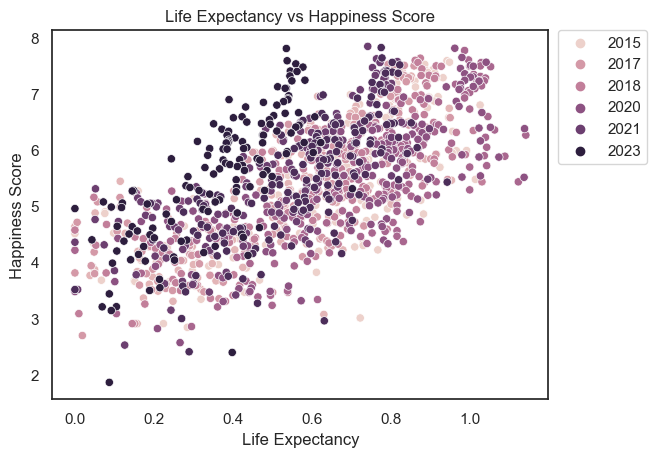

In [177]:
# Scatter plot Life Expectancy vs. Happiness Score
sns.scatterplot(data=df, x='Life Expectancy', y='Happiness Score', hue='Year')
plt.title('Life Expectancy vs Happiness Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

The plot represents the relationship between two variables: `Life Expectancy` and `Happiness Score`. The data used for the plot is derived from the DataFrame, df. Each data point on the plot represents a specific year, indicated by different colors or hues as specified by the `Year` variable. The x-axis represents the `Life Expectancy` values, which indicate the average lifespan or longevity of a population in a given country. The y-axis represents the corresponding `Happiness Score`, which quantifies the subjective well-being or happiness level of a country.

By examining the distribution of the data points on the scatter plot, we can analyze the correlation between Life Expectancy and Happiness Score. According to the plot, we can see that the data points cluster closely and show an upward trend from left to right, it indicates a positive correlation. In this case, higher life expectancy values are associated with higher Happiness Scores. This pattern suggests that longer life expectancy might contribute to increased happiness levels.


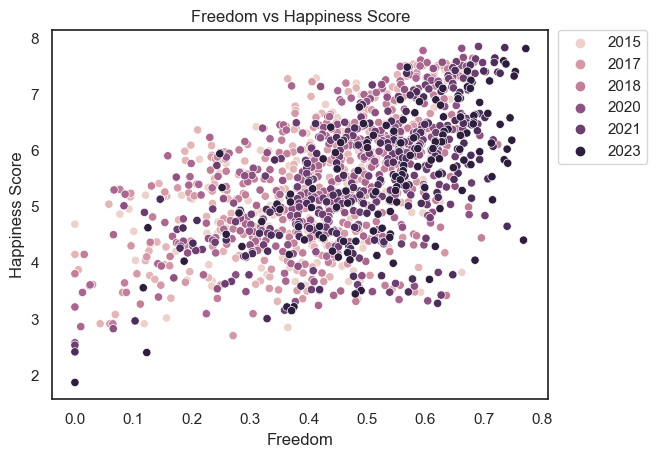

In [178]:
# Scatter plot Freedom vs. Happiness Score
sns.scatterplot(data=df, x='Freedom', y='Happiness Score', hue='Year')
plt.title('Freedom vs Happiness Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

The x-axis represents the `Freedom` values, which likely denote the degree of personal or societal freedom in a country. This variable may capture aspects such as individual rights, civil liberties, political freedom, and the absence of oppression or restrictions. The y-axis represents the corresponding `Happiness Score`, which quantifies the subjective well-being or happiness level of a country.

By examining the distribution of the data points on the scatter plot, we can analyze the correlation between Freedom and Happiness Score. According to the plot, we can see that  the data points cluster closely and show an upward trend from left to right, it suggests a positive correlation. In this case, higher levels of freedom are associated with higher Happiness Scores. This pattern suggests that greater personal or societal freedom may contribute to increased happiness levels.

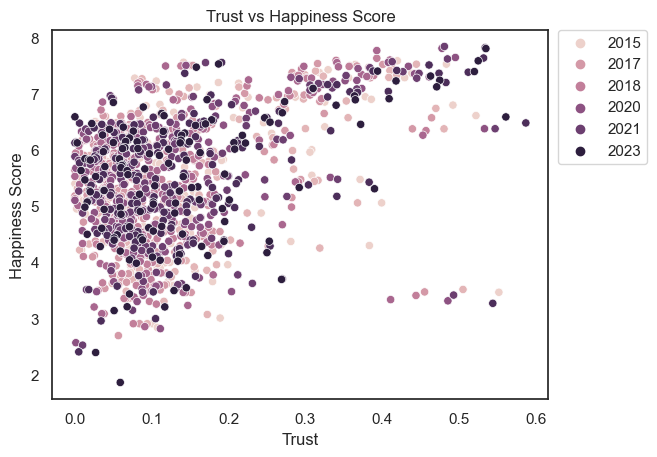

In [179]:
# Scatter plot Trust vs. Happiness Score
sns.scatterplot(data=df, x='Trust', y='Happiness Score', hue='Year')
plt.title('Trust vs Happiness Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In this scatterplot, the x-axis represents `Trust` and the y-axis represents the `Happiness Score`. As compared to other scatterplots, the data points are clustered together but not as much as we saw on other scatterplots. This shows that trust and happiness are also related but not as important as other factors suggest. 

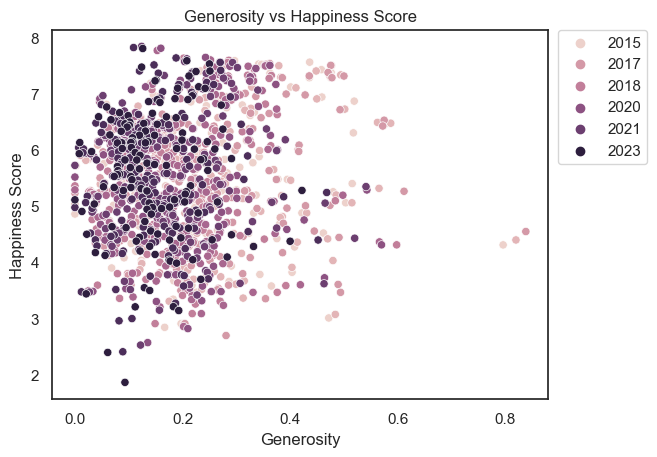

In [180]:
# Scatter plot Generosity vs. Happiness Score
sns.scatterplot(data=df, x='Generosity', y='Happiness Score', hue='Year')
plt.title('Generosity vs Happiness Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In this scatterplot, the x-axis represents `Generosity` and the y-axis represents the `Happiness Score`. Here, `Generosity` represents being kind and helping others. The data points are clustered together and on the top left which shows that `Generosity` and `Happiness` are very closely related. Moreover, we can see that there are more dark circles than light circles which are together which means the people tend to be more generous and happy in recent years.  

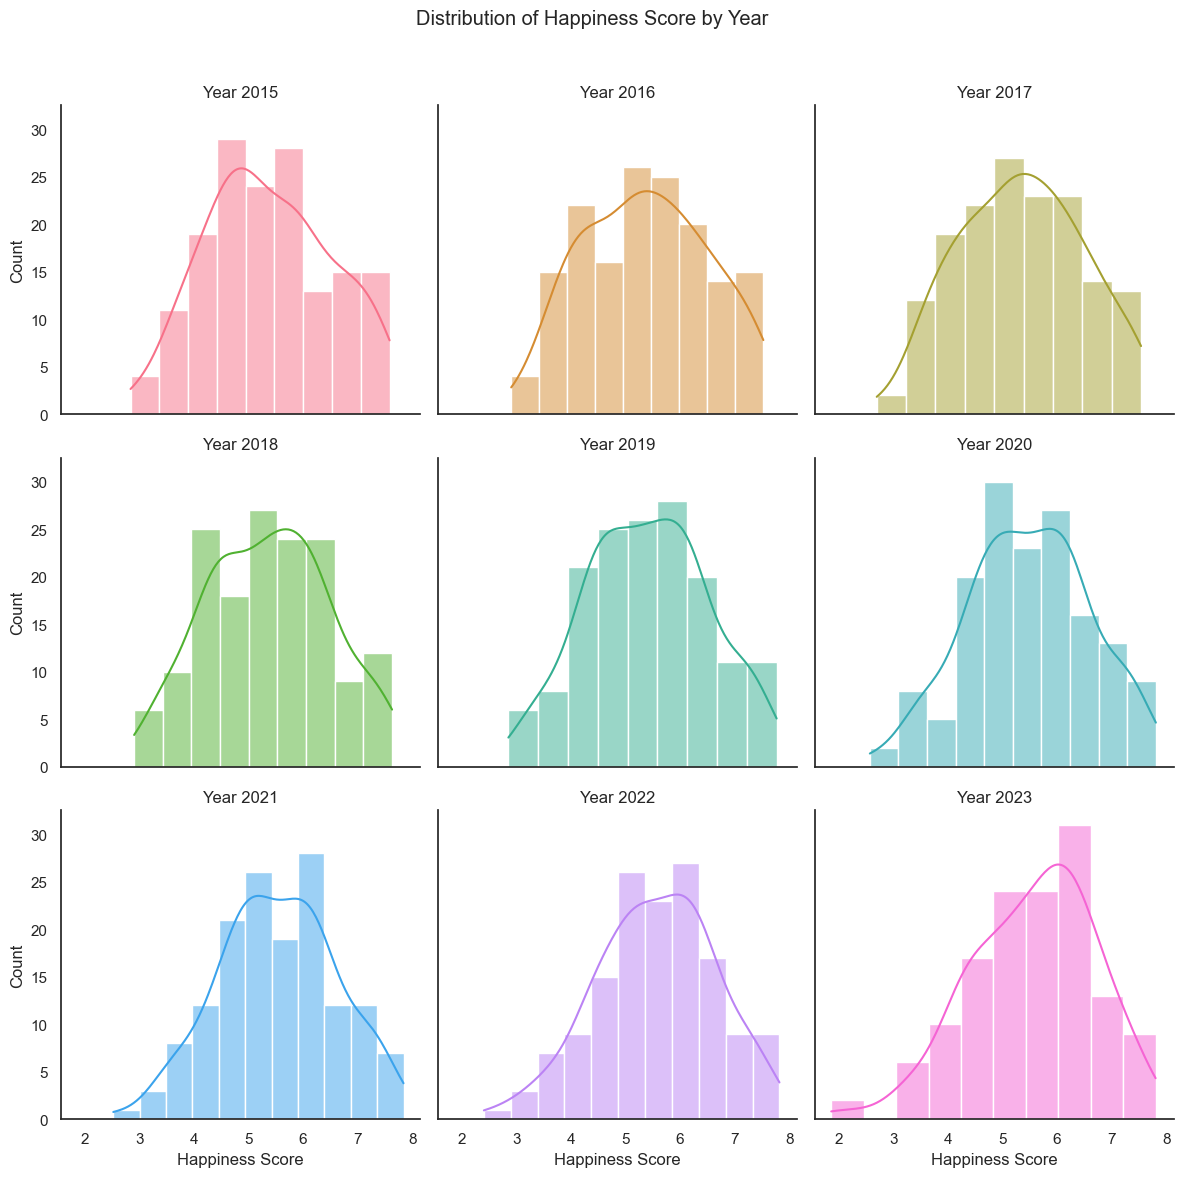

In [181]:
# Create a FacetGrid with histograms for each year
g = sns.FacetGrid(df, col="Year", hue="Year", height=4, col_wrap=3)
g.map(sns.histplot, "Happiness Score", kde=True)
g.set_titles("Year {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Happiness Score by Year')
plt.figsize = (10, 10)
plt.show()

Here, we made bar graphs to compare the distribution of the `Happiness Score` between different years. The x-axis represents the different years and the y-axis is the count of `Happiness Score`. We were not able to interpret any specific trend but we did notice that people tended to be more happier during the last few years. We specifically chose bar charts because it helps us to compare data between different years.

Let's take a look at the correlation matrix for the dataframe. This will allow us to see the correlation between each of the variables, showing us which variables are most correlated with the Happiness Score.

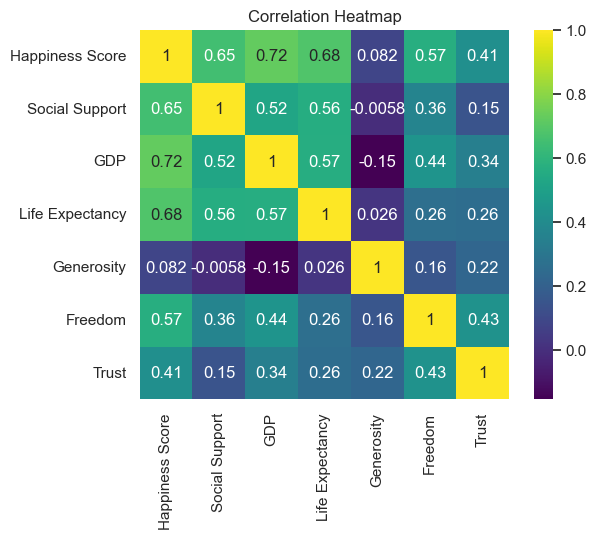

In [182]:
correlation_matrix = df[['Happiness Score', 'Social Support', 'GDP', 'Life Expectancy', 'Generosity', 'Freedom', 'Trust']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', square=True)
plt.title('Correlation Heatmap')
plt.show()

We can see that the `Happiness Score` is most correlated with `GDP`, `Social Support`, and `Life Expectancy`.  We can also see that the `Happiness Score` is least correlated with `Generosity` and `Trust`. 

We can also start looking at the trends for specific countries over the years. 

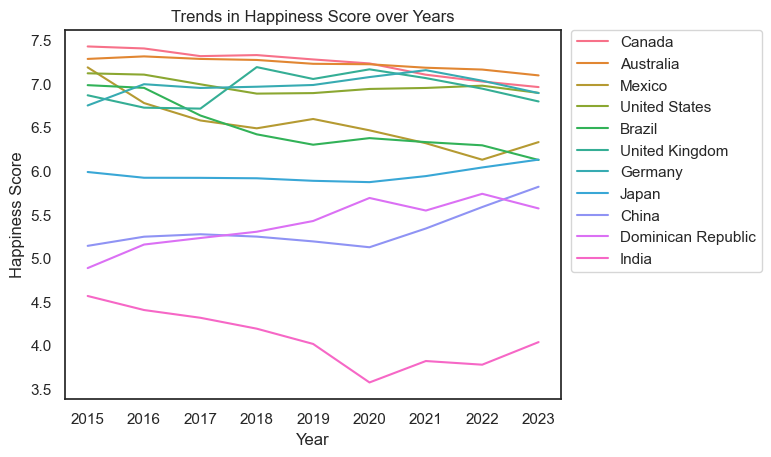

In [143]:
countries = ['United States', 'Canada', 'United Kingdom', 'Germany', 'Japan', 'China', 'India', 'Brazil', 'Mexico', 'Australia', 'Dominican Republic']
select_df = df[df['Country or Region'].isin(countries)]

sns.lineplot(x='Year', y='Happiness Score', data=select_df, hue='Country or Region')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Trends in Happiness Score over Years')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()
